# Predicting Heart Disease Risk: A Machine Learning Approach for Early Detection and Improved Patient Outcomes.

# Attribute Information:

A data frame with 462 observations on the following 10 variables.(Typical: Target variable='chd')

* sbp: Systolic blood pressure (mmHg)

* tobacco: Cumulative tobacco (kg)

* ldl: Low density lipoprotein cholesterol level

* adiposity: Severe overweight (a numeric vector)

* famhist: Family history of heart disease (binary: 0 = no, 1 = yes)

* typea: Type-A behavior

* obesity: Excessive fat accumulation (a numeric vector)

* alcohol: Current alcohol consumption

* age: Age in years

* chd: Presence of coronary heart disease (binary: 0 = no, 1 = yes)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('/SAHeart.csv')
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


# Exploratory Data Analysis

In [3]:
data.info()

data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


,0
row.names,0
sbp,0
tobacco,0
ldl,0
adiposity,0
famhist,0
typea,0
obesity,0
alcohol,0
age,0


There are no missing values in this dataset

In [4]:
data.shape

(462, 11)

There are 462 rows and 10 columns in out data

In [5]:
data.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


Summary statistics of the dataset

In [6]:
data.columns

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

columns headers present in our data

In [7]:
data = data.drop('row.names', axis=1)
data.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

Row names were dropped from the dataset as they provide no predictive value for our heart disease analysis. Retaining them could potentially introduce noise or unintended bias into the modeling process, leading to less accurate or less generalizable results.

In [8]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [9]:
data['famhist']=data['famhist'].map({'Absent':0, 'Present':1})
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


"We encoded the categorical variable 'famhist' (family history of heart disease) by replacing 'absent' with 0 and 'present' with 1. This transformation facilitates better analysis and visualization and enables our machine learning models to effectively utilize this information during training."

In [10]:
chd_counts = data['chd'].value_counts()
chd_counts

,count
chd,
0,302
1,160


Text(0.5, 1.0, 'Distribution of Coronary Heart Disease')

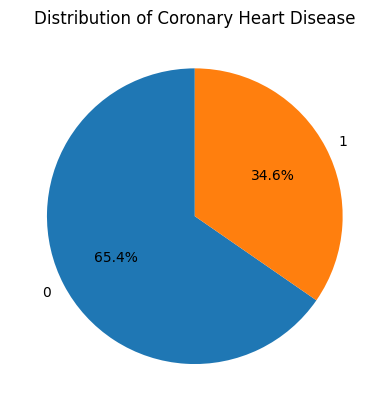

In [11]:
# Create the pie chart
plt.pie(chd_counts, labels=chd_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Coronary Heart Disease')

* 302 people people has coronary heart disease while 160 people do not have
* 65percent of the people didn't have heart disease while 35percent has



* This might play a role later in modeling because we have an imblanced dataset

In [12]:
famhist_chd = data.groupby(['famhist', 'chd']).size().rename('famhist_chd')
famhist_chd

famhist  chd
0        0      206
         1       64
1        0       96
         1       96
Name: famhist_chd, dtype: int64

Text(50.722222222222214, 0.5, 'Family History of Heart Disease (0 = No, 1 = Yes)')

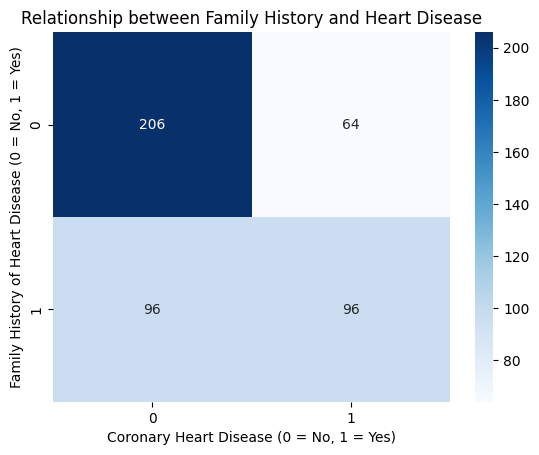

In [13]:
# Create a cross-tabulation (contingency table)
famhist_chd_table = pd.crosstab(data['famhist'], data['chd'])

# Plot the heatmap
sns.heatmap(famhist_chd_table, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Family History and Heart Disease')
plt.xlabel('Coronary Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Family History of Heart Disease (0 = No, 1 = Yes)')

This shows that a family history of heart disease plays a significant role in people having heart disease, as seen; out of 260 people with no family history of heart disease only 64 people had heart disease while 206 didn't have, on the other hand of 192 people with family history of heart disease; 96 people had heart disease while 96 didn't

<Axes: ylabel='Frequency'>

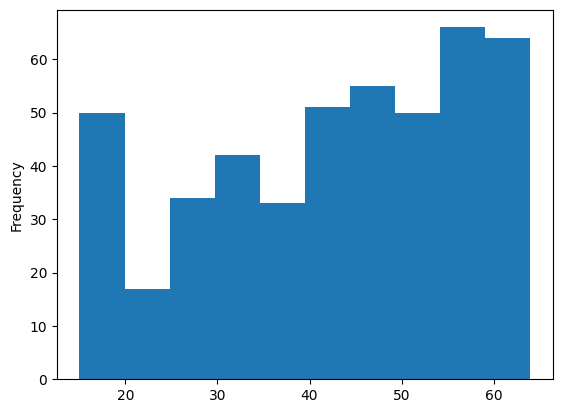

In [14]:
# age distribution of the data with histogram
age_dist = data.age.plot.hist()
age_dist

In [15]:
data['age'].value_counts().head(7)

,count
age,
16,20
58,17
17,17
61,16
59,16
55,16
60,15


The age distribution shows most of the people in our data falls in the age bracket of 55-61 but people at age of 16 occured most.

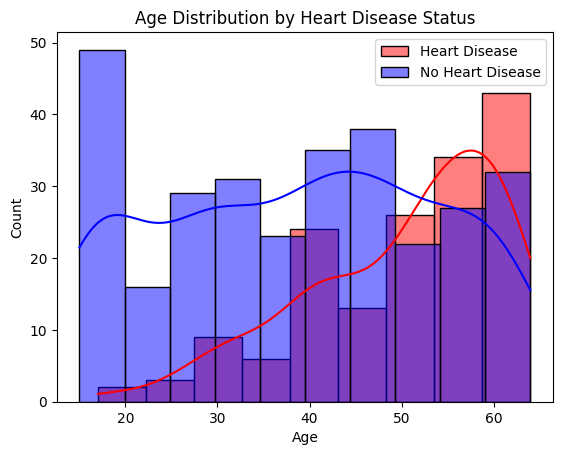

In [16]:
# Separate data for those with and without heart disease
with_chd = data[data['chd'] == 1]['age']
without_chd = data[data['chd'] == 0]['age']

# Plot histograms with overlaid distributions
sns.histplot(with_chd, color='red', label='Heart Disease', kde=True)
sns.histplot(without_chd, color='blue', label='No Heart Disease', kde=True)

plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

This trend shows the risk of having heart disease inreases with age.

In [17]:
data[data['chd'] == 1]['age'].value_counts().head()

,count
age,
58,13
59,11
55,10
61,9
64,7


Intuitively older people got to have heart disease more than younger people.

In [18]:
correlation_matrix = data.corr()

print(correlation_matrix)

                sbp   tobacco       ldl  adiposity   famhist     typea  \
sbp        1.000000  0.212247  0.158296   0.356500  0.085645 -0.057454   
tobacco    0.212247  1.000000  0.158905   0.286640  0.088601 -0.014608   
ldl        0.158296  0.158905  1.000000   0.440432  0.161353  0.044048   
adiposity  0.356500  0.286640  0.440432   1.000000  0.181721 -0.043144   
famhist    0.085645  0.088601  0.161353   0.181721  1.000000  0.044809   
typea     -0.057454 -0.014608  0.044048  -0.043144  0.044809  1.000000   
obesity    0.238067  0.124529  0.330506   0.716556  0.115595  0.074006   
alcohol    0.140096  0.200813 -0.033403   0.100330  0.080520  0.039498   
age        0.388771  0.450330  0.311799   0.625954  0.239667 -0.102606   
chd        0.192354  0.299718  0.263053   0.254121  0.272373  0.103156   

            obesity   alcohol       age       chd  
sbp        0.238067  0.140096  0.388771  0.192354  
tobacco    0.124529  0.200813  0.450330  0.299718  
ldl        0.330506 -0.033403

Text(0.5, 1.0, 'Correlation Heatmap')

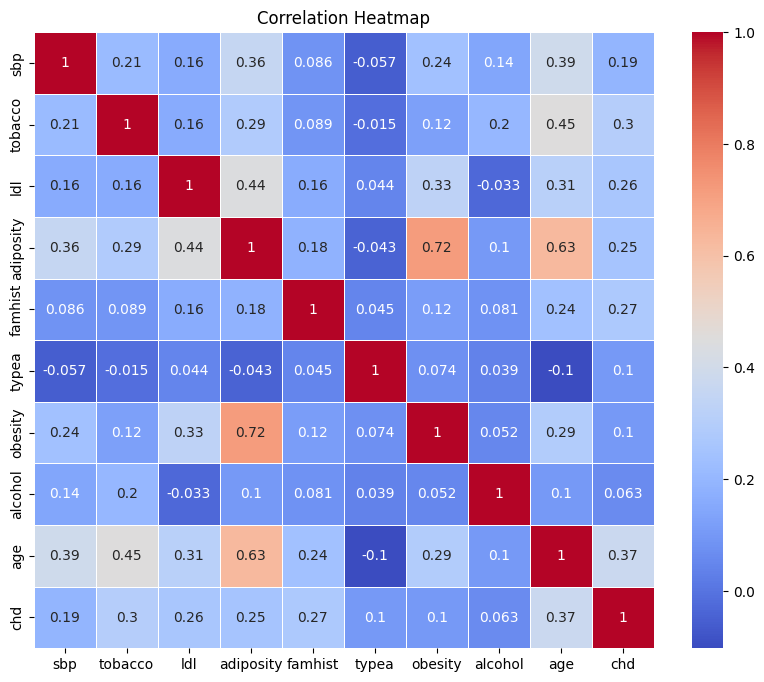

In [19]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')

* There is a strong positive correlation between between Obesity and adiposity (0.72) which makes sense considering if a person is observed he likely to have high body fat.
* There is a moderate positive correlation between between tobacco and age (0.45) which means older people slightly tend to consume tobacco than younger people (which makes sense because people that have been smoking for a long time will have a higher risk of having heart disease)
* There is a moderate positive correlation between between age and presence of heart disease(chd) at 0.37 which means older people slightly have a higher tendency of having heart disease.
* There is a moderately strong positive correlation between between age and adiposity (0.63),older people tend to have more body fat than younger people.

# Implementing ANN

In [20]:
X = data.drop('chd', axis=1)
y = data['chd']

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 5. Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 6. Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4115 - loss: 1.2077 - val_accuracy: 0.6081 - val_loss: 1.1029
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6054 - loss: 1.0949 - val_accuracy: 0.6892 - val_loss: 1.0511
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6237 - loss: 1.0248 - val_accuracy: 0.6486 - val_loss: 1.0121
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6664 - loss: 0.9815 - val_accuracy: 0.6486 - val_loss: 0.9780
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6765 - loss: 0.9457 - val_accuracy: 0.6486 - val_loss: 0.9494
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6987 - loss: 0.8926 - val_accuracy: 0.6486 - val_loss: 0.9257
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6478 - loss: 0.9125 - val_accuracy: 0.6351 - val_loss: 0.9020
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6884 - loss: 0.8599 - val_accuracy: 0.6351 - val_loss: 

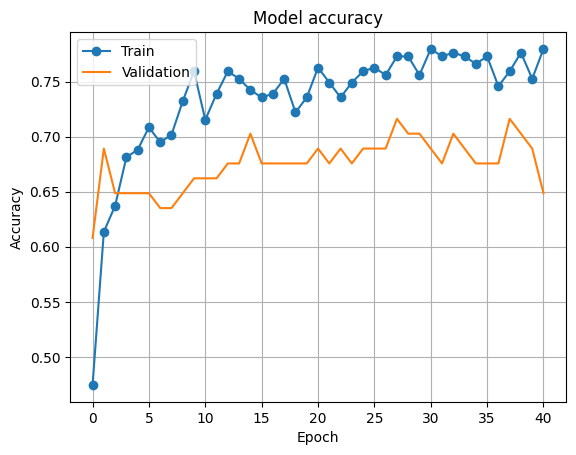

In [76]:
plt.plot(history.history['accuracy'], marker='o', linestyle='-')
plt.plot(history.history['val_accuracy'], linestyle='-')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

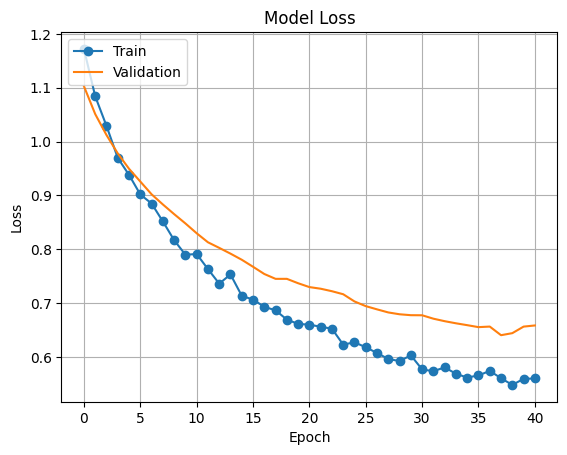

In [77]:
plt.plot(history.history['loss'], marker='o', linestyle='-')  # Added marker='o' for dots
plt.plot(history.history['val_loss'], linestyle='-')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)

In [84]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs >= 0.5).astype(int)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


Text(70.72222222222221, 0.5, 'True Label')

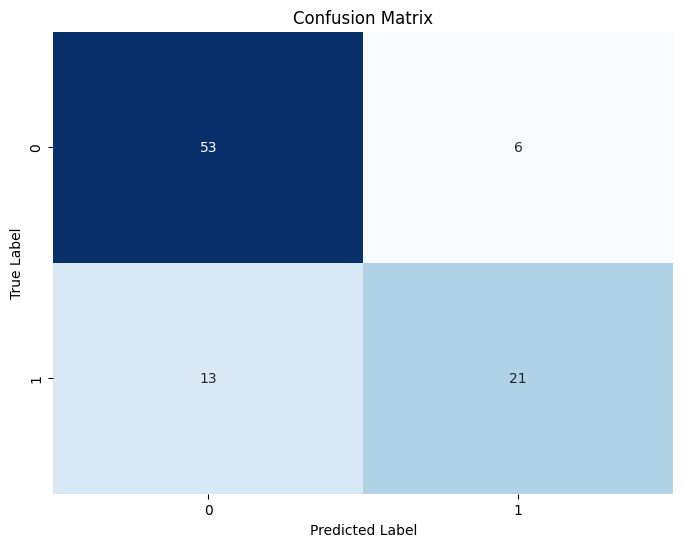

In [87]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

In [86]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80
